# PCA From Scratch On Our Dataset

## Objective

Implement PCA from scratch on iris dataset and compare it with PCA of sklearn

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
data1 = pd.read_csv('20_1_label_audacity_fft_4096.csv')
data2 = pd.read_csv('3_1_label_audacity_fft_4096.csv')
data=pd.merge(data1, data2, how='outer')
data.shape

((2786, 34), (3234, 34))

In [5]:
#droping the target column
target = data['Label']
data_x = data.iloc[:,:-1]

In [6]:
data_x.drop(columns='Time',axis=1,inplace=True)
data_x.head()

/home/alinemati/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.000151,0.006731,0.038160,0.122250,0.619624,0.852590,2.006131,9.886749,5.163902,0.576140,...,1.524685,0.578651,0.423511,0.335998,0.143669,0.847958,1.247838,0.520465,0.212812,0.288409
1,0.000686,0.007918,0.127324,0.479002,1.247594,1.578580,7.212063,44.919682,29.015004,2.048588,...,2.572313,0.854713,0.651885,0.564615,0.139401,1.403768,3.027509,1.667832,0.648602,0.443065
2,0.002154,0.019306,0.320672,2.186688,2.793614,2.716665,15.356530,158.165656,115.511267,4.651591,...,3.508699,1.132747,1.147086,1.139257,0.140545,2.220519,5.959900,3.881229,1.440649,0.618445
3,0.004357,0.056964,0.491644,5.033526,4.916641,3.253247,17.048730,308.907031,236.834594,6.554657,...,2.457164,0.968648,1.353352,1.630699,0.149633,2.087206,6.246836,4.620853,1.650553,0.504265
4,0.012292,0.117727,0.795111,7.481471,6.796962,3.085091,13.075452,404.129051,302.076556,7.274173,...,0.958583,0.529498,1.025430,1.608584,0.144275,1.118493,3.528551,2.967228,1.012816,0.237154


## PCA Implementation from Scratch

### Step 1: Normalize the data so that whole data will be in single scale

In [7]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
data = scale.fit_transform(data_x.values)

In [8]:
data.shape

(6020, 32)

### Step2 :  Generate a Covariance matrix

In [9]:
df_matrix = np.asmatrix(data)
print(df_matrix.shape)

(6020, 32)


In [10]:
covar_matrix = np.cov(df_matrix.T)
print(covar_matrix.shape)

(32, 32)


Observation - Over covariance matrix will be of 4*4 dimension

### Step3 : Compute eigen values and eigen vectors

Now, let us find the eigen values and eigen vectors of the covariance matrix . This is also called an eigen decomposition. The eigen values tell us the variance in the data set and eigen vectors tell us the corresponding direction of the variance.

In [11]:
eigvalues, eigvectors = np.linalg.eig(covar_matrix)

In [12]:
print(eigvalues)

[6.65777388 3.00072778 2.77442516 2.12130189 1.88051162 1.4593188
 1.41504648 1.35058008 1.20400218 1.1407256  1.039922   1.00390249
 0.9817589  0.9106931  0.70879938 0.65019138 0.53581752 0.00847332
 0.01009794 0.03267692 0.03666624 0.07449682 0.06492261 0.11814028
 0.5043514  0.45206446 0.24040214 0.22303325 0.37896194 0.36618727
 0.33822563 0.32111801]


### Step4: Select top k eigen values and corresponding eigen vectors

Suppose we want top 2 features.As we have the top 2 eigen vectors and the original matrix with us, its time to form the new data set with reduced k-dimensions (here k=2). PCA being a linear technique, it forms linear equation between the old data set and new data set.

new data set =dot product([old data set],[eigen vector] )

In [13]:
top2eig = eigvectors[:,0:2]
top3eig = eigvectors[:,0:3]
top2eig[1:5] , top3eig[1:5]

(array([[ 0.06631338, -0.30102099],
        [ 0.11950533, -0.26432743],
        [ 0.20979633, -0.18563983],
        [ 0.19608536, -0.22229251]]),
 array([[ 0.06631338, -0.30102099, -0.29823674],
        [ 0.11950533, -0.26432743, -0.18629654],
        [ 0.20979633, -0.18563983, -0.28794763],
        [ 0.19608536, -0.22229251, -0.32853812]]))

### Step5: Transforming data

In [18]:
new_data = data_x.dot(top2eig) 
new_data_3d = data_x.dot(top3eig) 

In [20]:
new_data.head() , new_data_3d.shape  , new_data.shape

(            0           1
 0    9.499976    2.855304
 1   41.999440   19.589639
 2  155.014537   82.184105
 3  325.359778  179.636528
 4  458.431762  254.740555,
 (6020, 3),
 (6020, 2))

In [22]:
#creating a new dataframe including target
new_df = pd.DataFrame(np.hstack((new_data,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Label'])
new_df_pca_3d = pd.DataFrame(np.hstack((new_data_3d,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component' , '3nd_component','Label'])

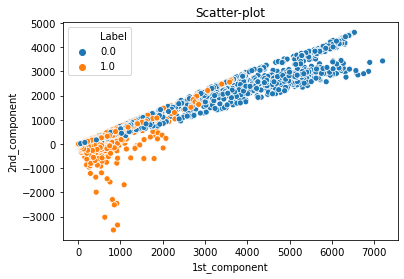

In [23]:
#plotting data
sns.scatterplot(new_df['1st_component'],new_df['2nd_component'],hue=new_df['Label'])
plt.title('Scatter-plot')
plt.show()

# PCA Using Sklearn

In [24]:
pca  = PCA(n_components=2)
#here data is scaled data that we did earlier using standard scalar
pca_components = pca.fit_transform(data)
print(pca_components.shape)

(6020, 2)


Here pca_components will give the result obtained by dot product of our data and matrix of top 2 eigen vectors

In [25]:
#creating a new dataframe including target
new_df_pca = pd.DataFrame(np.hstack((pca_components,np.array(target).reshape(-1,1))),columns=['1st_component','2nd_component','Label'])


In [26]:
new_df_pca.head()

,1st_component,2nd_component,Label
0,-1.407825,-0.116375,1.0
1,-1.331686,-0.098931,1.0
2,-1.127689,-0.082888,0.0
3,-0.890404,-0.101626,0.0
4,-0.744836,-0.120297,0.0


In [27]:
new_df_pca_3d.head()

,1st_component,2nd_component,3nd_component,Label
0,9.499976,2.855304,0.632656,1.0
1,41.999440,19.589639,1.351907,1.0
2,155.014537,82.184105,5.210978,0.0
3,325.359778,179.636528,13.767505,0.0
4,458.431762,254.740555,24.311346,0.0


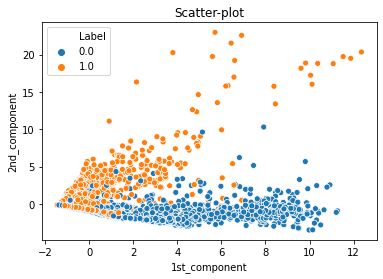

In [28]:
#plotting data
sns.scatterplot(new_df_pca['1st_component'],new_df_pca['2nd_component'],hue=new_df_pca['Label'])
plt.title('Scatter-plot')
plt.show()

# Principle Component Analysis (PCA) for Data Visualization 

In [29]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

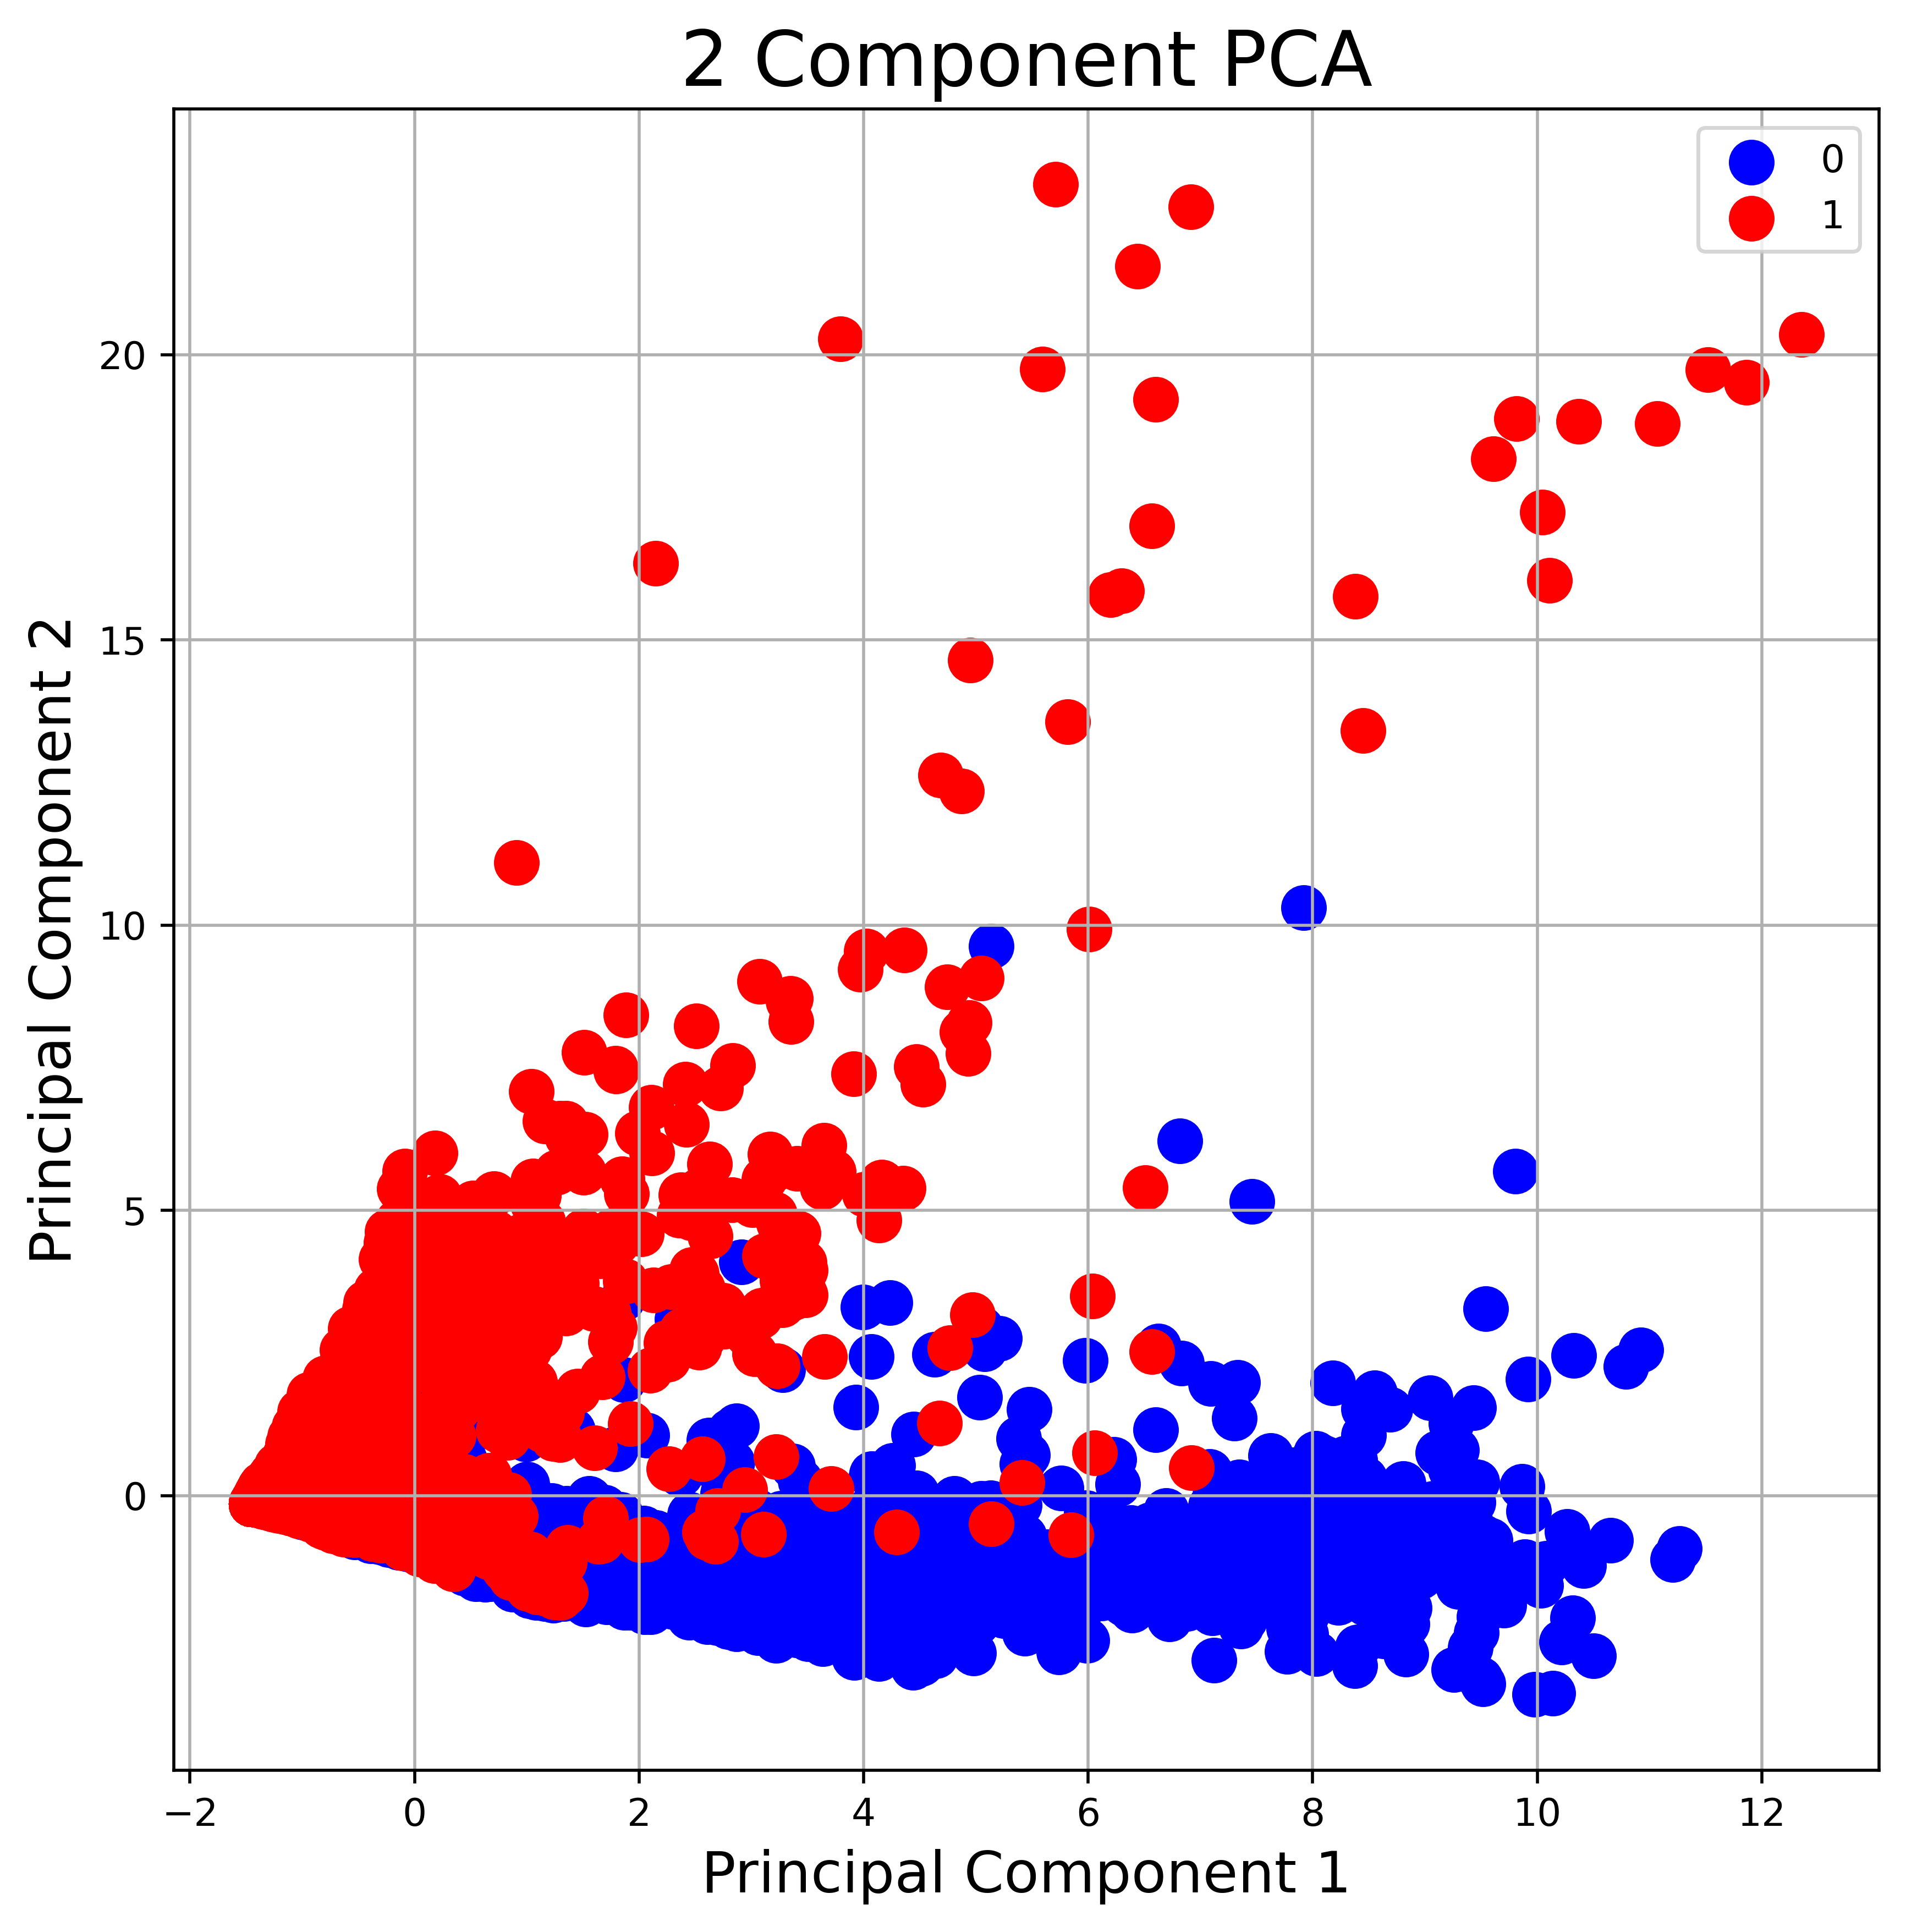

In [30]:
fig = plt.figure(figsize = (8,8)  , dpi=(500))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [ 0 , 1 ]
colors = ['b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = new_df_pca['Label'] == target
    ax.scatter(new_df_pca.loc[indicesToKeep, '1st_component']
               , new_df_pca.loc[indicesToKeep, '2nd_component']
               , c = color
               , s = 120)
targets = [  "0" , "1" ]
ax.legend(targets)

ax.grid()


Save file

In [93]:
fig.savefig('output_PCA_2d.png' , dpi=(500))
fig.savefig('output_PCA_2d.pdf' ,  dpi=(500))